In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()
print('Tensorflow version: %s' % str(tf.__version__))

import sys
import os
if sys.platform.startswith('darwin'):
    print('Enable multiple instances of OpenMP on macOS')
    os.environ['KMP_DUPLICATE_LIB_OK']='True'
    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Tensorflow version: 2.0.0
Enable multiple instances of OpenMP on macOS


In [2]:
print('Prepare movie text dataset')
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print('shape of training data is %s' % str(train_data.shape))

Prepare movie text dataset


/Users/hzhou/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


shape of training data is (25000,)


/Users/hzhou/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print('Prepare word mapping')
word_index = imdb.get_word_index() # download mapping

word_index = {k:(v+3) for k,v in word_index.items()} # preserve first 3 index
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # get value-key mapping

def decode_review(text): # define decoding function
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


Prepare word mapping


In [4]:
for i in range(5):
    print('The {}th comment: '.format(i+1), end='')
    print(decode_review(train_data[i]))
    print()

The 1th comment: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [5]:
print('Pad comment into fixed-length data')
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


Pad comment into fixed-length data


In [6]:
print('Prepare model')
vocab_size = 10000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Prepare model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [7]:
print('Prepare training parameters')
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Prepare training parameters


In [8]:
print('Split data into 2 parts to train and verify')
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Split data into 2 parts to train and verify


In [9]:
print('Train the model')
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train the model
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 8s 555us/sample - loss: 0.6920 - accuracy: 0.5743 - val_loss: 0.6903 - val_accuracy: 0.6883
Epoch 2/40
15000/15000 [==============================] - 4s 272us/sample - loss: 0.6874 - accuracy: 0.7158 - val_loss: 0.6841 - val_accuracy: 0.6980
Epoch 3/40
15000/15000 [==============================] - 5s 310us/sample - loss: 0.6779 - accuracy: 0.7351 - val_loss: 0.6718 - val_accuracy: 0.7454
Epoch 4/40
15000/15000 [==============================] - 4s 278us/sample - loss: 0.6602 - accuracy: 0.7653 - val_loss: 0.6510 - val_accuracy: 0.7649
Epoch 5/40
15000/15000 [==============================] - 4s 284us/sample - loss: 0.6322 - accuracy: 0.7877 - val_loss: 0.6207 - val_accuracy: 0.7653
Epoch 6/40
15000/15000 [==============================] - 4s 278us/sample - loss: 0.5956 - accuracy: 0.8047 - val_loss: 0.5838 - val_accuracy: 0.7936
Epoch 7/40
15000/15000 [==========

Show history


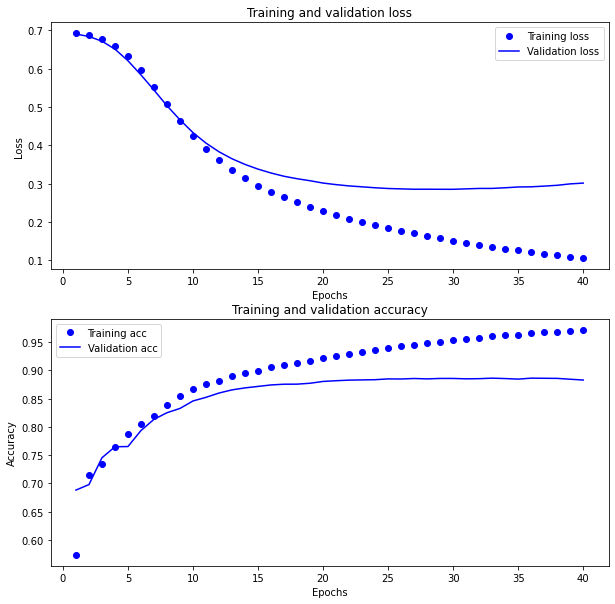

In [10]:
print('Show history')
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,10))

plt.subplot(211) # show loss history
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212) # show accuracy history
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
print('Evaluate training result')
results = model.evaluate(test_data,  test_labels, verbose=2)
print(results)

Evaluate training result
25000/1 - 2s - loss: 0.3334 - accuracy: 0.8732
[0.3198085645389557, 0.87316]
